- How PyTorch improves training performance;
- Working with PyTorch's `Dataset` and `Dataloader` to build input pipelines and enable efficient model training;
- Working with PyTorch to write optimized machine learning code;
- Using the `torch.nn` module to implement common deep learning architectures conveniently;
- Choosing activation functions for artificial NNs.

# PyTorch

Mathematically, tensors can be understood as a generalization of scalars, vectors, matrices and so on. More concretely, a scalar can be defined as a rank-0 tensor, a vector can be defined as a rank-1 tensor, a matrix can be defined as a rank-2 tensor, and matrices stacked in a third dimension can be defined as a rank-3 tensor.

In [1]:
import torch
import numpy as np
np.set_printoptions(precision=3)
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [2]:
# Different ways to generate tensors
t_ones = torch.ones([2,3])
rand_tensor = torch.rand([2,3])
print(t_ones)
print(rand_tensor)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.0398, 0.4129, 0.2572],
        [0.5735, 0.9955, 0.0802]])


In [3]:
# Change the datatype of a tensor
t_a_new = t_a.to(torch.float32)
print(t_a_new.dtype)

torch.float32


In [4]:
# Transpose a tensor
t = torch.rand([3,5])
t_T = torch.transpose(t,0,1)
print(t.shape,"-->",t_T.shape)
# Reshape a tensor
t = torch.zeros(30)
t_reshaped = t.reshape(5,6)
print(t_reshaped.shape)
# Squeeze a tensor
t = torch.zeros(1, 2, 1, 4, 1)
t_sqz = torch.squeeze(t,2)
print(t.shape,"-->",t_sqz.shape)

torch.Size([3, 5]) --> torch.Size([5, 3])
torch.Size([5, 6])
torch.Size([1, 2, 1, 4, 1]) --> torch.Size([1, 2, 4, 1])


In [5]:
torch.manual_seed(1)
t1 = 2 * torch.rand(5,2) - 1 # using uniform distribution
t2 = torch.normal(mean=0,std=1,size=(5,2)) # using uniform distribution

# Let's do some operations
# Element wise multiplication
print(t1*t2)

# Mean on a specified dimension
print(t1.mean(0))

# Matrix multiplication
print(t1 @ t2.transpose(0,1))

# Computing the l1 norm on a specified dimension
print(torch.linalg.norm(t1,ord=2,dim=1))

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])
tensor([-0.1373,  0.2028])
tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])
tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


In [6]:
torch.manual_seed(1)

# Splitting a tensor
t = torch.rand(6)
print(t.split(2))
print(t.split([4,2]))

# Concatenating tensors
A = torch.ones(3)
B = torch.zeros(2)
C = torch.cat((A,B),0)
print(C)
# Stacking tensors along a dimension
A = torch.ones(3)
B = torch.zeros(3)
C = torch.stack((A,B),1)
print(C)


(tensor([0.7576, 0.2793]), tensor([0.4031, 0.7347]), tensor([0.0293, 0.7999]))
(tensor([0.7576, 0.2793, 0.4031, 0.7347]), tensor([0.0293, 0.7999]))
tensor([1., 1., 1., 0., 0.])
tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


# Building input pipelines in PyTorch

## Creating a PyTorch DataLoader from existing tensors
If the data already exists in the form of a tensor object, a Python list or a NumPy array, we can easily create a dataset loader using the `torch.utils.data.Dataloader` class.

In [7]:
from torch.utils.data import DataLoader
t = torch.arange(6,dtype=torch.float32)
data_loader = DataLoader(
    t, # the iterator to use in order to create the batches
    batch_size=3
)

for item in data_loader:
    print(item)

tensor([0., 1., 2.])
tensor([3., 4., 5.])


## Combining two tensors into a joint dataset

In [8]:
torch.manual_seed(1)
t_x = torch.rand([4,3],dtype=torch.float32)
t_y = torch.arange(4)

from torch.utils.data import Dataset
class JointDataset(Dataset):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
    def __len__(self):
        return len(self.x)

    def __getitem__(self,idx):
        return self.x[idx], self.y[idx]

joint_dataset = JointDataset(t_x,t_y)
# or more conveniently
from torch.utils.data import TensorDataset
joint_dataset = TensorDataset(t_x,t_y)

for item in joint_dataset:
    print(item[0],item[1])

tensor([0.7576, 0.2793, 0.4031]) tensor(0)
tensor([0.7347, 0.0293, 0.7999]) tensor(1)
tensor([0.3971, 0.7544, 0.5695]) tensor(2)
tensor([0.4388, 0.6387, 0.5247]) tensor(3)


## Shuffle batch and repeat

In [9]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset,batch_size=2,shuffle=True) # shuffle applies random shuffling to the entire dataset

# Simulating a training loop
for e in range(2):
    print(f"epoch {e+1}")
    for i, batch in enumerate(data_loader,1):
        print(f"batch {i}: {batch[0]} - {batch[1]}")

epoch 1
batch 1: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) - tensor([2, 0])
batch 2: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) - tensor([1, 3])
epoch 2
batch 1: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) - tensor([0, 2])
batch 2: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) - tensor([1, 3])


## Creating a dataset from files on your local storage

In [10]:
import pathlib
imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(file_list)

['cat_dog_images/cat-01.jpg', 'cat_dog_images/cat-02.jpg', 'cat_dog_images/cat-03.jpg', 'cat_dog_images/dog-01.jpg', 'cat_dog_images/dog-02.jpg', 'cat_dog_images/dog-03.jpg']


Image shape: (225, 225, 3)
Image shape: (259, 194, 3)
Image shape: (175, 287, 3)
Image shape: (190, 266, 3)
Image shape: (191, 264, 3)
Image shape: (175, 289, 3)


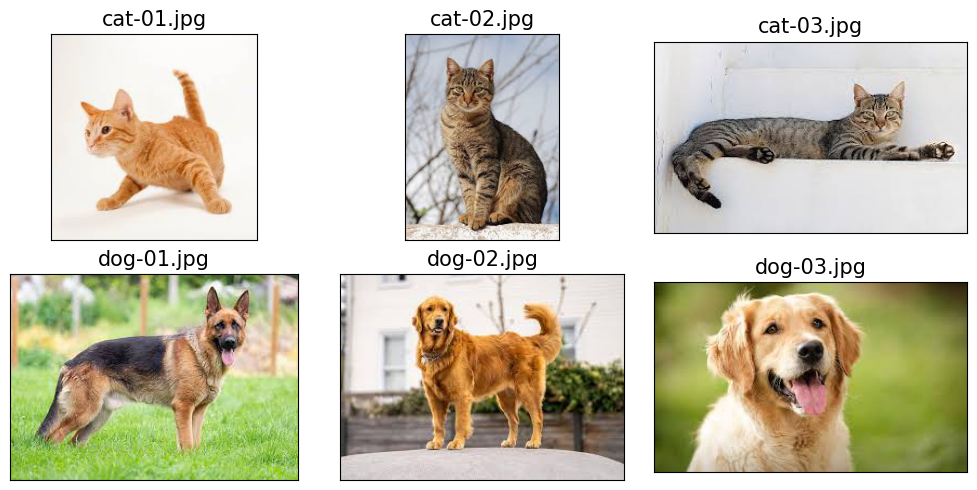

In [11]:
import matplotlib.pyplot as plt
import os
from PIL import Image
fig = plt.figure(figsize=(10,5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print(f'Image shape: {np.array(img).shape}')
    ax = fig.add_subplot(2,3,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file),size=15)
plt.tight_layout()
plt.show()

In [12]:
# Let's extract the labels from the filenames
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


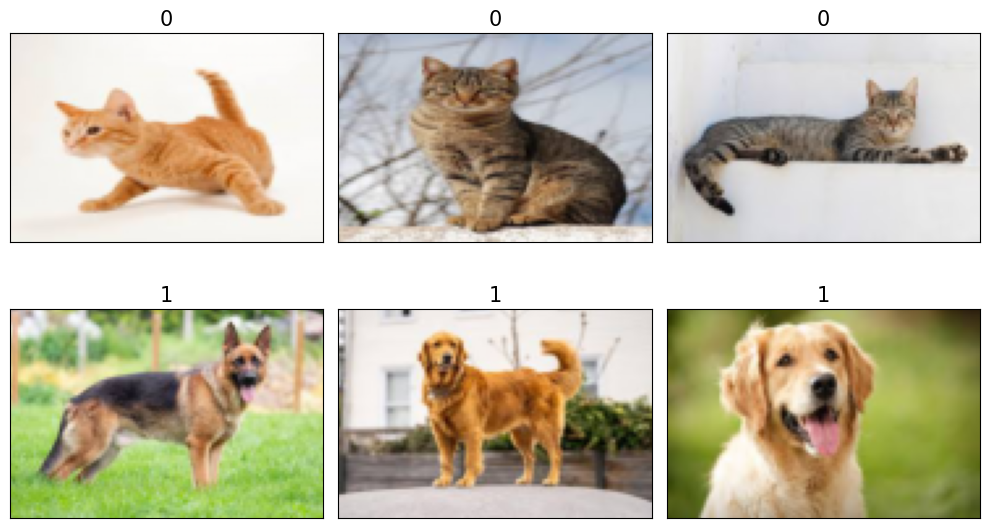

In [13]:
# Let's create the dataset
import torchvision.transforms.v2 as t
img_height, img_width = 80, 120
transform = t.Compose([
    t.ToImage(),
    t.ToDtype(torch.float32, scale=True),
    t.Resize((img_height,img_width))
])

class ImageDataset(Dataset):
    def __init__(self,file_list,labels,transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    
    def __len__(self):
        return len(self.labels)

image_dataset = ImageDataset(file_list,labels,transform)
fig = plt.figure(figsize=(10,6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1,2,0)))
    ax.set_title(f'{example[1]}', size=15)
plt.tight_layout()
plt.show()

The `__getitem__` method in the `ImageDataset` class wraps all three steps into a single function, including:
1. Loading of raw content (images and labels);
2. Decoding images into tensors;
3. Resizing the images.

## Fetching available datasets from the `torchvision.datasets` library

The `torchvision.datasets` library provides a nice collection of freely available image datasets for training or evaluating deep learning models. Similarly `torchtext.datasets` library provides datasets for natural language.

For the celeba dataset download from [here](https://drive.google.com/drive/folders/0B7EVK8r0v71pWEZsZE9oNnFzTm8?resourcekey=0-5BR16BdXnb8hVj6CNHKzLg) the following files (search through the various subfolders of the drive repository):
- identity_CelebA.txt
- img_align_celeba/ (unzipped from the following zip file)
- img_align_celeba.zip
- list_attr_celeba.txt
- list_bbox_celeba.txt
- list_eval_partition.txt
- list_landmarks_align_celeba.txt
- list_landmarks_celeba.txt

Put all of this files inside of a `celeba/` folder in the same directory of the notebook.

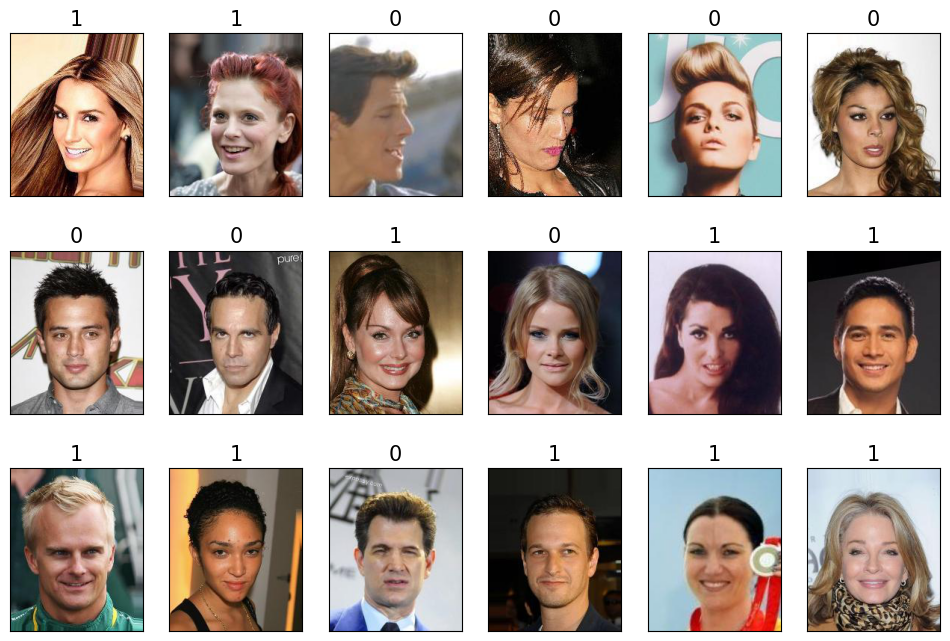

In [ ]:
import torchvision
image_path = './'
celeba_dataset = torchvision.datasets.CelebA(image_path,split='train',target_type='attr',download=False)

from itertools import islice
fig = plt.figure(figsize=(12,8))
for i, (image,attributes) in islice(enumerate(celeba_dataset),18):
    ax = fig.add_subplot(3,6,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image)
    ax.set_title(f'{attributes[31]}',size=15)
plt.show()

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.24MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 284kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.62MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.94MB/s]


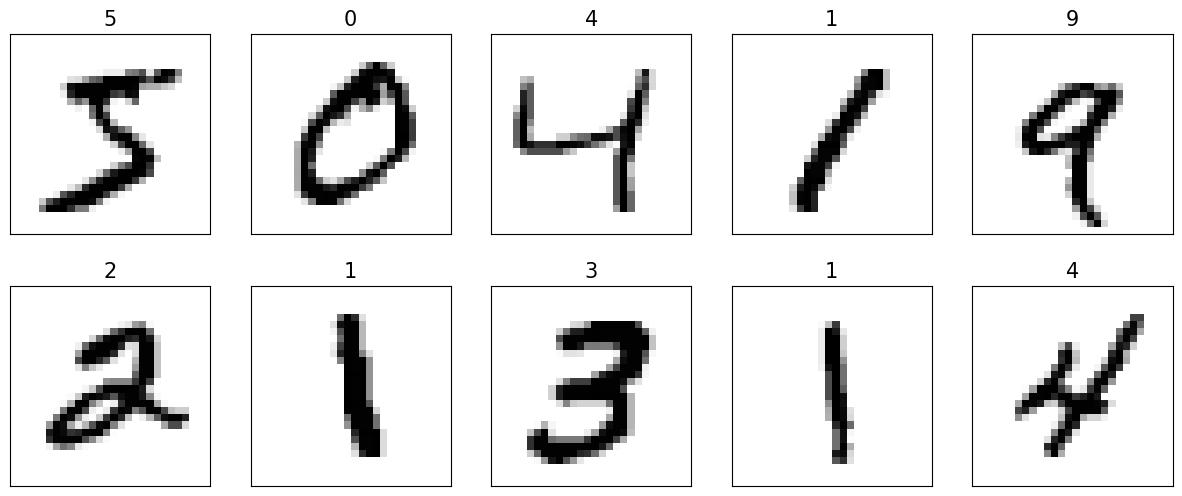

In [16]:
# Loading the mnist dataset
mnist_dataset = torchvision.datasets.MNIST(image_path,'train',download=True)
fig = plt.figure(figsize=(15,6))
for i, (image,label) in islice(enumerate(mnist_dataset),10):
    ax = fig.add_subplot(2,5,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image,cmap="gray_r")
    ax.set_title(f'{label}',size=15)
plt.show()

# Building a NN model in PyTorch

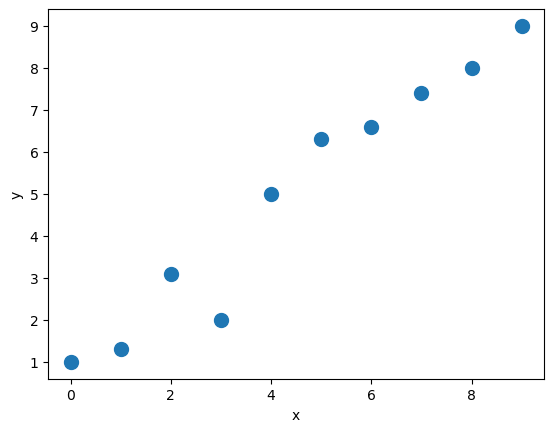

In [17]:
# Let's build a linear regression model to get a grasp on torch.nn module

X_train = np.arange(10,dtype='float32').reshape((10,1))
y_train = np.array([1.,1.3,3.1,2.0,5.0,6.3,6.6,7.4,8.,9.],dtype='float32')
plt.plot(X_train,y_train,'o',markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
from torch.utils.data import TensorDataset
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train).float()
train_ds = TensorDataset(X_train_norm,y_train)
batch_size = 1
train_dl = DataLoader(train_ds,batch_size,shuffle=True)

torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1,requires_grad=True)

def model(xb):
    return xb @ weight + bias

# MSE
def loss_fn(input, target):
    return (input-target).pow(2).mean()

In [19]:
# Let's train the model
learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred,y_batch.long())
        loss.backward()

    with torch.no_grad():
        weight -= weight.grad * learning_rate
        bias -= bias.grad * learning_rate
        weight.grad.zero_()
        bias.grad.zero_()
    
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 41.2725
Epoch 10 Loss 24.4285
Epoch 20 Loss 1.0575
Epoch 30 Loss 15.1630
Epoch 40 Loss 12.5989
Epoch 50 Loss 5.0840
Epoch 60 Loss 0.7865
Epoch 70 Loss 3.7489
Epoch 80 Loss 2.4036
Epoch 90 Loss 0.4430
Epoch 100 Loss 1.1155
Epoch 110 Loss 1.3195
Epoch 120 Loss 0.1064
Epoch 130 Loss 0.5676
Epoch 140 Loss 0.2216
Epoch 150 Loss 1.4862
Epoch 160 Loss 0.0483
Epoch 170 Loss 0.0061
Epoch 180 Loss 0.0016
Epoch 190 Loss 0.0294


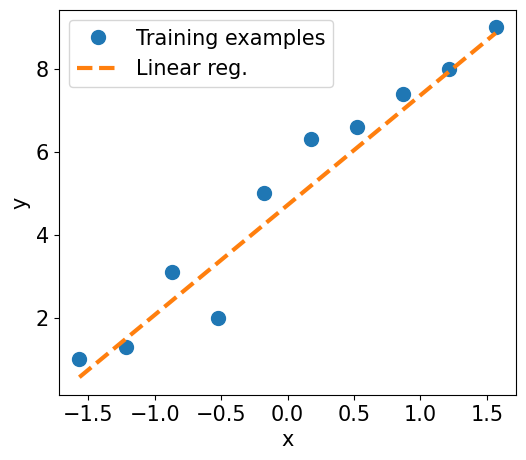

In [ ]:
# Let's visualise the model
X_test = np.linspace(0,9,num=100,dtype='float32').reshape(-1,1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy() # detatch is just used to create a copy of the original tensor without
# gradients
fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(1,2,1)
plt.plot(X_train_norm,y_train,'o',markersize=10)
plt.plot(X_test_norm,y_pred,'--',lw=3)
plt.legend(['Training examples','Linear reg.'],fontsize=15)
ax.set_xlabel('x',size=15)
ax.set_ylabel('y',size=15)
ax.tick_params(axis='both',which='major',labelsize=15)
plt.show()

## Model training via the `torch.nn` and the `torch.optim` modules

Previously we've done everything by hand, however the `torch.nn` offers a set of loss functions, and `torch.optim`
supports most commonly used optimization algorithms that can be called to update the parameters based on the computed 
gradients.

In [23]:
import torch.nn as nn
loss_fn = nn.MSELoss(reduction="mean")
input_size = 1
output_size = 1
model = nn.Linear(input_size,output_size)
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [ ]:
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:,0]
        loss = loss_fn(pred, y_batch)
        # Computing gradients
        loss.backward()
        # Updating parameters using gradients
        optimizer.step()
        # Resetting the gradients to zero
        optimizer.zero_grad()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')
    

Epoch 0 Loss 43.5096
Epoch 10 Loss 21.1944
Epoch 20 Loss 14.9152
Epoch 30 Loss 9.6822
Epoch 40 Loss 0.1829
Epoch 50 Loss 0.0797
Epoch 60 Loss 2.5602
Epoch 70 Loss 2.0594
Epoch 80 Loss 0.9029
Epoch 90 Loss 1.2190
Epoch 100 Loss 0.3155
Epoch 110 Loss 0.1608
Epoch 120 Loss 1.6553
Epoch 130 Loss 0.4432
Epoch 140 Loss 0.1176
Epoch 150 Loss 0.1092
Epoch 160 Loss 2.0660
Epoch 170 Loss 2.1306
Epoch 180 Loss 2.1844
Epoch 190 Loss 0.1112


# Building a multilayer perceptron for classifying flowers in the Iris dataset

In [32]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1./3,random_state=1)

In [33]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm,y_train)
torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds,batch_size,shuffle=True)

Now let's create a fully connected layer, best represented by $f(w\times x + b)$, where $x$ represents a tensor containing the input features, $w$ and $b$ are the weight matrix and the bias tensor, while $f$ is the activation function.

In [34]:
class Model(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size,hidden_size)
        self.layer2 = nn.Linear(hidden_size,output_size)
    
    def forward(self,x: torch.Tensor):
        x = self.layer1(x)
        x = x.sigmoid()
        x = self.layer2(x)
        return x

input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size,hidden_size,output_size)

In [35]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [36]:
num_epochs = 100
loss_hist = [0]*num_epochs
acc_hist = [0]*num_epochs

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred,dim=1) == y_batch).float()
        acc_hist[epoch] += is_correct.sum()
    loss_hist[epoch] /= len(train_dl.dataset)
    acc_hist[epoch] /= len(train_dl.dataset)

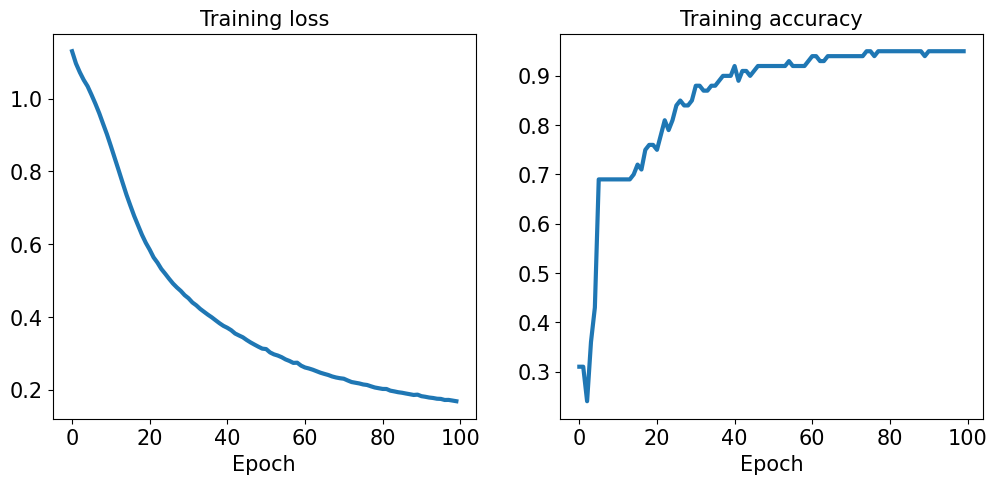

In [37]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,2,1)
ax.plot(loss_hist,lw=3)
ax.set_title('Training loss',size=15)
ax.set_xlabel('Epoch',size=15)
ax.tick_params(axis='both',which='major',labelsize=15)
ax = fig.add_subplot(1,2,2)
ax.plot(acc_hist,lw=3)
ax.set_title('Training accuracy',size=15)
ax.set_xlabel('Epoch',size=15)
ax.tick_params(axis='both',which='major',labelsize=15)

In [38]:
# Let's evaluate the trained model on the test dataset
X_test_norm = (X_test -np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)
pred_test = model(X_test_norm)
correct = (torch.argmax(pred_test,dim=1) == y_test).float()
accuracy = correct.mean()
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800


# Saving and reloading the trained model

In [42]:
checkpoint_name = 'iris_classifier.pt'
torch.save(model, checkpoint_name) # This will save both the model architecture and all the learned parameters

In [43]:
model_new = torch.load(checkpoint_name,weights_only=False) # This will retrieve both the model architecture and the parameters, to
# rebuild the and reload the parameters

model_new.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [48]:
torch.save(model.state_dict(),"weights_" + checkpoint_name) # This is done to save just the weights

In [50]:
model_new = Model(input_size,hidden_size,output_size)
model_new.load_state_dict(torch.load("weights_"+checkpoint_name)) # This is done to load the weights previously saved

<All keys matched successfully>

# Choosing activation function for multilayer neural networks

It wouldn't be very useful to use linear activation functions for both hidden and output layers, since we want to
introduce nonlinearity in a typical artificial NN to be able to tackle complex problems.

_The sum of linear functions yields a linear function after all._

The sigmoid activation function can be problematic if we have highly negative input, since since the output of the
sigmoid function will be close to zero in this case. If the sigmoid function returns outputs that are close to zero, the
NN will learn very slowly, and it will be more likely to get trapped in the local minima of the loss landscape during
training.

This is why people often prefer a hyperbolic tangent as an activation function in hidden layers.

## Logistic function recap

If we calculate the net input $z$ and use it to activate a logistic neuron, if we get a value of 0.88, we can interpret
it as an 88.8 percent probability that that particular sample belongs to that class (represented by the neuron's
output).

However, when we used the one-hot encoding technique to represent multiclass ground truth labels and designed the
layer consisting of multiple logistic activation units, it didn't make much sense, it doesn't produce meaningful,
interpretable probability values. The reason is that they do not sum to 1.
However, this is, in fact, not a big concern if we use our model to predict only the class labels and not the class
membership probabilities (which means how much the model is certain about each class).

## Estimating class probabilities in multiclass classification via the softmax function

The softmax function provides the probability of each class. Therefore, it allows us to compute meaningful class
probabilities in multiclass settings (multinomial logistic regression).

In softmax, the probability of a particular sample with net input $z$ belonging to the $i$th classcan be computed with
a normalization term in the denominator, that is, the sum of the exponentially weighted linear functions:
$$p(z) = \sigma(z) = \frac{e^{z_i}}{\sum_{j=1}^Me^{z_j}}$$

In [58]:
Z = np.array([1.78,-0.76,1.65])
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))
y_probas = softmax(Z)
print("Probabilities: \n",y_probas)
np.sum(y_probas)

Probabilities: 
 [0.511 0.04  0.449]


1.0

In [59]:
# In PyTorch
torch.softmax(torch.from_numpy(Z).float(),dim=0)

tensor([0.5110, 0.0403, 0.4487])

# Broadening the output spectrum using a hyperbolic tangent
Another sigmoidal function is the hyperbolic tangent (commonly known as tanh), which can be interpreted as a rescaled
version of the logistic function:
$$
\sigma_{logistic}(z) = \frac{1}{1+e^{-z}} \\
\sigma_{tanh}(z) = 2\times\sigma_{logistic}(2z)-1 = \frac{e^z-e^{-z}}{e^z+e^{-z}}
$$

The advantage of the hyperbolic tangent over the logistic function is that it has a broader output spectrum ranging in
the open interval (-1,1), which can improve the convergence of the backpropagation algorithm.

In [60]:
torch.tanh(torch.from_numpy(Z).float())

tensor([ 0.9447, -0.6411,  0.9289])

# Rectified linear unit activation

We should firstly step back and understand the vanishing gradient problem of tanh and the sigmoid.

To understand the problem, let's assume that we initially have the net input $z_1=20$, which changes to $z_2=25$.
Computing the tanh activation, we get $\sigma(z_1)=1$ and $\sigma(z_2)=1$, which shows no change in the output (due to
the asymptotic behaviour of the tanh function and numerical errors).

This means that the derivative of activations with respect to the net input diminishes as $z$ becomes large. As a
result, learning the weights during the training phase becomes very slow because the gradient terms may be very close to
zero. 

ReLU activation adresses this issue:
$$\sigma(z)=\max(0,z)$$

The derivative of ReLU, with respect to its input, is always 1 for positive input values. Therefore, it solves the
problem of vanishing gradients, making it suitable for deep NNS.

In [61]:
torch.relu(torch.from_numpy(Z))

tensor([1.7800, 0.0000, 1.6500], dtype=torch.float64)